In [7]:
import pandas
import nltk
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy import array as np_array


TENSED_POS_TAGS = ['VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
STANCE_INDICES = {'FAVOR': 0, 'NONE': 1, 'AGAINST': 2}
TAG_SET = {}


def pos_tag(s):
    return nltk.pos_tag(nltk.word_tokenize(s))


def add_to_tag_set(s):
    tags = nltk.pos_tag(nltk.word_tokenize(s['Tweet']))
    for tag in tags:
        if tag[1] in TAG_SET:
            TAG_SET[tag[1]] = TAG_SET[tag[1]] + 1
        else:
            TAG_SET[tag[1]] = 1


def get_tag_set(rows):
    list(map(add_to_tag_set, rows))


def tag_is_tensed(tag):
    return tag[1] in TAG_SET


def get_target_rows(d_frame, target):
    if target == 'ALL':
        return list(
            map((lambda x: x[1]), d_frame.iterrows()))
    return list(
        filter((lambda row: row['Target'] == target),
            map((lambda x: x[1]), d_frame.iterrows())))


def get_tensed_tagged_words(rows):
    return list(
        map(
            (lambda row:
                list(filter(tag_is_tensed, pos_tag(row['Tweet'])))),
            rows))


def tensed_tag_counts(tags):
    just_tags = list(map((lambda x: x[1]), tags))
    return list(map((lambda tag: just_tags.count(tag)), TENSED_POS_TAGS))


def get_x_train(tags_for_tweets):
    return list(map(tensed_tag_counts, tags_for_tweets))


def onehot_for_stance(stance):
    one_hot = [0,0,0]
    one_hot[STANCE_INDICES[stance]] = 1
    return one_hot


def get_y_train(rows):
    return list(
        map(onehot_for_stance,
            map((lambda row: row['Stance']), rows)))


def get_xy_data(filename, target):
    training_df = pandas.read_csv(filename, sep='\t', encoding='latin1')
    target_rows = get_target_rows(training_df, target)
    # Get tags
    get_tag_set(target_rows)
    tensed_tagged_tweets = get_tensed_tagged_words(target_rows)
    x_train = get_x_train(tensed_tagged_tweets)
    y_train = get_y_train(target_rows)
    return (x_train, y_train)

# Training the model

In [10]:
labels = {
    'ALL': 'ALL',
    'HILLARY': 'Hillary Clinton',
    'ABORTION': 'Legalization of Abortion'
}

(x_train, y_train) = get_xy_data('trainingdata.txt', labels['ALL'])
(x_test, y_test) = get_xy_data('trialdata.txt', labels['ALL'])

{'WRB': 388, 'DT': 3371, 'FW': 17, 'VBD': 681, ')': 97, 'RP': 175, 'RBS': 37, '#': 6540, 'NNS': 2445, 'IN': 4387, 'NNPS': 91, 'CC': 1184, 'LS': 2, 'UH': 36, 'MD': 790, 'VB': 2546, 'TO': 1229, '.': 3495, 'JJ': 4296, 'CD': 605, 'WDT': 115, '$': 36, ':': 664, '(': 75, '``': 237, 'WP$': 5, 'NN': 7469, 'PDT': 35, 'VBP': 2018, 'JJR': 136, 'VBN': 698, 'NNP': 10429, 'POS': 265, "''": 254, 'JJS': 118, 'RBR': 63, 'SYM': 4, 'VBG': 1073, 'WP': 336, 'VBZ': 1790, ',': 1179, 'RB': 2643, 'PRP$': 843, 'PRP': 2989, 'EX': 79}


{'WRB': 388, 'DT': 3371, 'FW': 17, 'VBD': 681, ')': 97, 'RP': 175, 'RBS': 37, '#': 6540, 'NNS': 2445, 'IN': 4387, 'NNPS': 91, 'CC': 1184, 'LS': 2, 'UH': 36, 'MD': 790, 'VB': 2546, 'TO': 1229, '.': 3495, 'JJ': 4296, 'CD': 605, 'WDT': 115, '$': 36, ':': 664, '(': 75, '``': 237, 'WP$': 5, 'NN': 7469, 'PDT': 35, 'VBP': 2018, 'JJR': 136, 'VBN': 698, 'NNP': 10429, 'POS': 265, "''": 254, 'JJS': 118, 'RBR': 63, 'SYM': 4, 'VBG': 1073, 'WP': 336, 'VBZ': 1790, ',': 1179, 'RB': 2643, 'PRP$': 843, 'PRP': 2989, 'EX': 79}


Train on 1885 samples, validate on 929 samples
Epoch 1/25


  32/1885 [..............................] - ETA: 16s - loss: 1.1005 - acc: 0.5000

 960/1885 [==============>...............] - ETA: 0s - loss: 1.1011 - acc: 0.3604 

1885/1885 [==============================] - 0s - loss: 1.1004 - acc: 0.3554 - val_loss: 1.0672 - val_acc: 0.5382


Epoch 2/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0890 - acc: 0.4375

1120/1885 [================>.............] - ETA: 0s - loss: 1.0951 - acc: 0.3804

1885/1885 [==============================] - 0s - loss: 1.0925 - acc: 0.3825 - val_loss: 1.0531 - val_acc: 0.5780


Epoch 3/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0817 - acc: 0.5312

1120/1885 [================>.............] - ETA: 0s - loss: 1.0866 - acc: 0.4054

1885/1885 [==============================] - 0s - loss: 1.0889 - acc: 0.3958 - val_loss: 1.0450 - val_acc: 0.5856


Epoch 4/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0619 - acc: 0.5000

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0880 - acc: 0.4008

1885/1885 [==============================] - 0s - loss: 1.0869 - acc: 0.4005 - val_loss: 1.0406 - val_acc: 0.5888


Epoch 5/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0930 - acc: 0.3125

1312/1885 [===================>..........] - ETA: 0s - loss: 1.0874 - acc: 0.3986

1885/1885 [==============================] - 0s - loss: 1.0858 - acc: 0.4027 - val_loss: 1.0382 - val_acc: 0.6017


Epoch 6/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0876 - acc: 0.3438

1248/1885 [==================>...........] - ETA: 0s - loss: 1.0856 - acc: 0.3982

1885/1885 [==============================] - 0s - loss: 1.0850 - acc: 0.4080 - val_loss: 1.0363 - val_acc: 0.6017


Epoch 7/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0716 - acc: 0.3125

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0867 - acc: 0.4023

1885/1885 [==============================] - 0s - loss: 1.0844 - acc: 0.4090 - val_loss: 1.0347 - val_acc: 0.6028


Epoch 8/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0933 - acc: 0.4062

1312/1885 [===================>..........] - ETA: 0s - loss: 1.0853 - acc: 0.4162

1885/1885 [==============================] - 0s - loss: 1.0840 - acc: 0.4095 - val_loss: 1.0337 - val_acc: 0.6039


Epoch 9/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0967 - acc: 0.4375

1312/1885 [===================>..........] - ETA: 0s - loss: 1.0850 - acc: 0.4085

1885/1885 [==============================] - 0s - loss: 1.0835 - acc: 0.4069 - val_loss: 1.0333 - val_acc: 0.6017


Epoch 10/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0696 - acc: 0.3750

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0813 - acc: 0.4109

1885/1885 [==============================] - 0s - loss: 1.0831 - acc: 0.4090 - val_loss: 1.0328 - val_acc: 0.6017


Epoch 11/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0856 - acc: 0.4688

1248/1885 [==================>...........] - ETA: 0s - loss: 1.0798 - acc: 0.4111

1885/1885 [==============================] - 0s - loss: 1.0828 - acc: 0.4095 - val_loss: 1.0324 - val_acc: 0.6060


Epoch 12/25
  32/1885 [..............................] - ETA: 0s - loss: 1.1171 - acc: 0.3438

1312/1885 [===================>..........] - ETA: 0s - loss: 1.0806 - acc: 0.4062

1885/1885 [==============================] - 0s - loss: 1.0825 - acc: 0.4101 - val_loss: 1.0318 - val_acc: 0.6060


Epoch 13/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0568 - acc: 0.4375

1248/1885 [==================>...........] - ETA: 0s - loss: 1.0864 - acc: 0.4006

1885/1885 [==============================] - 0s - loss: 1.0823 - acc: 0.4106 - val_loss: 1.0326 - val_acc: 0.6060


Epoch 14/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0937 - acc: 0.3438

1216/1885 [==================>...........] - ETA: 0s - loss: 1.0785 - acc: 0.4211

1885/1885 [==============================] - 0s - loss: 1.0820 - acc: 0.4101 - val_loss: 1.0311 - val_acc: 0.6060


Epoch 15/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0521 - acc: 0.4688

1312/1885 [===================>..........] - ETA: 0s - loss: 1.0826 - acc: 0.4085

1885/1885 [==============================] - 0s - loss: 1.0816 - acc: 0.4117 - val_loss: 1.0320 - val_acc: 0.6060


Epoch 16/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0780 - acc: 0.4375

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0836 - acc: 0.4016

1885/1885 [==============================] - 0s - loss: 1.0814 - acc: 0.4106 - val_loss: 1.0319 - val_acc: 0.6060


Epoch 17/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0900 - acc: 0.3438

1344/1885 [====================>.........] - ETA: 0s - loss: 1.0817 - acc: 0.4129

1885/1885 [==============================] - 0s - loss: 1.0811 - acc: 0.4117 - val_loss: 1.0301 - val_acc: 0.6060


Epoch 18/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0995 - acc: 0.3125

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0779 - acc: 0.4180

1885/1885 [==============================] - 0s - loss: 1.0809 - acc: 0.4127 - val_loss: 1.0306 - val_acc: 0.6060


Epoch 19/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0682 - acc: 0.4375

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0816 - acc: 0.4055

1885/1885 [==============================] - 0s - loss: 1.0806 - acc: 0.4117 - val_loss: 1.0303 - val_acc: 0.6060


Epoch 20/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0780 - acc: 0.4375

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0854 - acc: 0.4102

1885/1885 [==============================] - 0s - loss: 1.0804 - acc: 0.4127 - val_loss: 1.0297 - val_acc: 0.6060


Epoch 21/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0913 - acc: 0.4062

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0779 - acc: 0.4156

1885/1885 [==============================] - 0s - loss: 1.0803 - acc: 0.4122 - val_loss: 1.0296 - val_acc: 0.6060


Epoch 22/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0621 - acc: 0.5000

1248/1885 [==================>...........] - ETA: 0s - loss: 1.0788 - acc: 0.4159

1885/1885 [==============================] - 0s - loss: 1.0800 - acc: 0.4127 - val_loss: 1.0297 - val_acc: 0.6039


Epoch 23/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0515 - acc: 0.3750

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0790 - acc: 0.4141

1885/1885 [==============================] - 0s - loss: 1.0799 - acc: 0.4122 - val_loss: 1.0290 - val_acc: 0.6039


Epoch 24/25
  32/1885 [..............................] - ETA: 0s - loss: 1.1041 - acc: 0.4062

1344/1885 [====================>.........] - ETA: 0s - loss: 1.0809 - acc: 0.4085

1885/1885 [==============================] - 0s - loss: 1.0797 - acc: 0.4122 - val_loss: 1.0295 - val_acc: 0.6028


Epoch 25/25
  32/1885 [..............................] - ETA: 0s - loss: 1.0790 - acc: 0.4375

1280/1885 [===================>..........] - ETA: 0s - loss: 1.0850 - acc: 0.3992

1885/1885 [==============================] - 0s - loss: 1.0795 - acc: 0.4159 - val_loss: 1.0310 - val_acc: 0.5996


dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


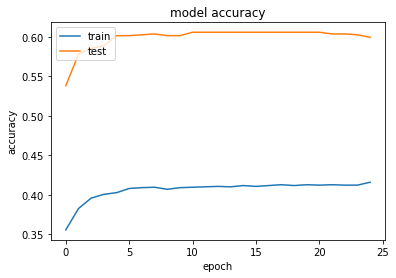

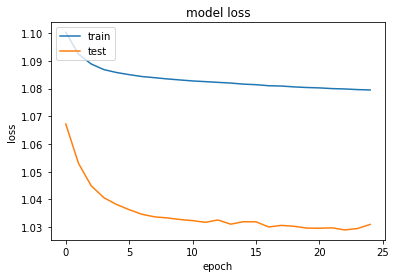

100/100 [==============================] - 0s


[1.0710170269012451, 0.49000000953674316]


In [24]:
# LEARN
model = Sequential()
model.add(Dense(units=32, input_dim=len(TENSED_POS_TAGS))) # layer
model.add(Activation('relu')) # layer
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dense(units=3)) # layer
model.add(Activation('softmax')) #layer

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.0005, momentum=0.9, nesterov=True),
              metrics=['accuracy']) # not layer

print(TAG_SET)

history = model.fit(np_array(x_train), np_array(y_train), validation_split=0.33, epochs=25, batch_size=32)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(loss_and_metrics)